In [1]:
cd ..

/home/constance/Documents/epfl/MA1/ML/predicting-poverty-through-time/src


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from lib import estimator_util as eu
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import listdir
from os.path import isfile, join

In [4]:
sns.set_theme()

In [5]:
def cnn_osm2(complete, model_, country, display_plot=False, **params):
        tmp_df = complete.loc[complete.country == country]
        years = tmp_df.groupby(["year"]).groups.keys()
        year = max(years)
        X, y = eu.get_recent_features(tmp_df, [country], all_cols)
        r2, y_hest, _ = eu.run_model(X, y, model_, seed=1, **params)
        if(display_plot):
            fig = eu.plot_predictions(y, y_hest, r2, country, year)
            fig.savefig(f"../figs/{country}_{year}_cnnosm_{model_.__name__}.pdf", dpi=600)
        return r2

In [6]:
files = [f for f in listdir("../data/cnn_features/") if isfile(join("../data/cnn_features/", f))]
files = list(filter(lambda a: 'ncomp' in a, files))
countries = ["NG", "ETH" ,"TZA", "MW"]

r2 = np.zeros((len(files),len(countries)))
nb_cluster = []
for i, f in enumerate(files):
    complete_df, all_cols = eu.get_data("../data/lsms/processed/_all_real.csv", "../data/cnn_features/"+f, "../data/")
    k = f[-6:-4].replace('_', '')
    nb_cluster.append(int(k))
    for j,country in enumerate(countries):
        r2[i,j] = cnn_osm2(complete_df, Ridge, country, alpha = 1000)

In [7]:
df = pd.DataFrame(r2, columns=countries)
df.insert(0, 'k', nb_cluster)
df = df.sort_values('k')
display(df)

,k,NG,ETH,TZA,MW
3,2,0.455357,0.291758,0.439413,0.512528
11,3,0.505598,0.291906,0.447948,0.514769
9,4,0.477019,0.283864,0.447081,0.505226
8,5,0.470591,0.277556,0.458331,0.532196
6,7,0.479919,0.279216,0.440130,0.512100
1,10,0.485669,0.285329,0.452560,0.520795
0,14,0.473703,0.307701,0.454786,0.520958
7,20,0.479904,0.295937,0.420314,0.508859
2,29,0.479998,0.305780,0.461424,0.505059
10,42,0.480748,0.305253,0.432885,0.519233


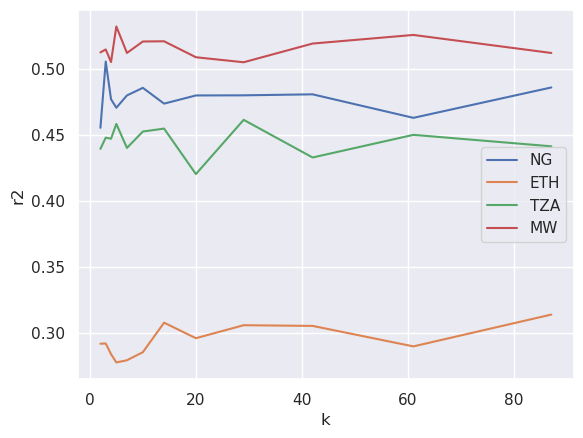

In [8]:
for country in countries :
    plt.plot(df['k'], df[country], label=country)
plt.xlabel('k')
plt.ylabel('r2')
plt.legend()

Text(0, 0.5, 'mean r2 for 4 countries')

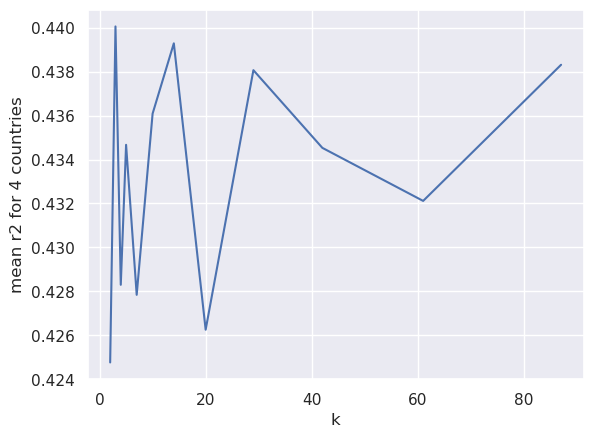

In [11]:
df2 = df[countries].mean(axis=1)
plt.plot(df['k'], df2)
plt.xlabel('k')
plt.ylabel('mean r2 for 4 countries')